<h1>
    Light-Nesis Prototype
</h1>

<h2>Table of Contents</h2>
<ol>
    <li><a href="#data-collection">Data collection</a></li>
    <li><a href="#preprocessing">Preprocessing/Feature extraction</a></li>
    <li>Model training</li>
    <li>Model evaluation</li>
</ol>

<h2 id="data-collection">Data Collection</h2>

In [1]:
import argparse
import time
from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds
from brainflow.data_filter import DataFilter
import os

In [66]:
# Parameters for data saving
sex = ["male", "female"][0]
participant = "01"
direction = ["left", "none", "right"][0]
run = "01"
ext = ".csv"
sfreq = 200 #Ganglion sampling rate

dir_path = os.path.join("data", sex, participant, direction)
file_path = os.path.join(dir_path, run + ext)

if not os.path.exists(dir_path):
    os.makedirs(dir_path)

In [ ]:
def collect_data():
    BoardShim.enable_dev_board_logger()

    # Arguments for board
    params = BrainFlowInputParams()
    params.serial_port = "/dev/cu.usbmodem11"

    # Make connection to board
    try:    
        board = BoardShim(BoardIds.GANGLION_BOARD, params)
        board.prepare_session()
        board.start_stream()
        time.sleep(27)
        data = board.get_board_data()  # get all data and remove it from internal buffer
        board.stop_stream()
        board.release_session()
        DataFilter.write_file(data, file_path, "w")
    except:
        print("Unable to connect to Ganglion Board")

collect_data()

<h2 id="preprocessing">Preprocessing/Feature Extraction</h2>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
def load_csv_eeg(gender, participant, direction, run):
    if gender is None or participant is None or direction is None or run is None:
        return "Please enter the required parameters"
    
    file_path = os.path.join("data", gender, participant, direction, run + ".csv")
    
    data = DataFilter.read_file(file_path)
    
    df = pd.DataFrame(np.transpose(data))
    df.drop(labels=[0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], inplace=True, axis=1)
    
    return df

example_params = ["male", "01", "left", "01"]

In [105]:
csv_df = load_csv_eeg(*example_params)

In [106]:
csv_df

,1,2,3,4
0,-0.228134,3.328511,-3.560385,-3.328511
1,-12.977453,-19.608295,-24.956352,-24.335529
2,13.295344,9.076737,10.879369,1.731574
3,-9.895775,-19.952366,-23.628688,-31.624594
4,-9.959354,-21.665240,-26.411173,-32.570789
...,...,...,...,...
5397,-583.947979,-1123.125616,-545.769210,-700.930180
5398,-551.762400,-1096.979975,-496.765301,-656.279514
5399,-559.320738,-1109.733034,-510.344878,-673.696228
5400,-577.784624,-1141.709179,-541.741338,-714.438698


<AxesSubplot:>

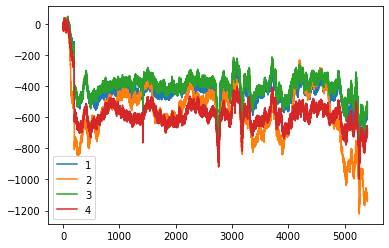

In [118]:
csv_df.plot()